<h2 style="color: #e67300;
           background-color: #FFFDD0; /* cream color */  
           font-family: 'Trebuchet MS', sans-serif; 
           font-weight: bold; 
           text-align: left; 
           padding: 15px;
           border-radius: 10px;
           font-size: 36px;
           margin-top: 50px;">
Customer Lifetime Value Analysis - E-commerce Sector
</h2>

<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:130%; text-align:left">
<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>About Company:</font></h2>
    
Founded in 1960, FLO is one of the leading companies in the Turkish footwear market. With the vision of leading the footwear sector in Turkey and elevating it to the top ranks in global production, FLO directly employs over 15,000 people and indirectly provides employment to nearly 30,000 people. Today, FLO operates more than 850 stores domestically and internationally across 30 countries, including the CIS, the Middle East, and North Africa.</p>

<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:120%; text-align:left">
    
First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:120%; text-align:left">
    
Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis. After this we will view the dataset to understand the type and data columns:

In [2]:
#Import Dataset 
df = pd.read_csv("flo_data.csv")
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:120%; text-align:left">
<h3 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Observations:</font></h3>  
    
This dataset consists `19945 enteries` and have `12 columns`. From a preliminary overview, all columns have non-null values, indicating a `clean dataset` in terms of missing values.
    
`first_order_date`, `last_order_date`, `last_order_date_online` and `last_order_date_offline` these columns require conversion to `datetime` datatype as it is in `object` datatype

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Data Cleaning and Transformation:</font></h2> 

In [4]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date','last_order_date_online','last_order_date_offline','order_num_total_ever_online','order_num_total_ever_offline','customer_value_total_ever_offline','customer_value_total_ever_online','interested_in_categories_12'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12


In [5]:
# Check for missing values
print(df.isnull().sum())

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64


In [6]:
# Convert date columns to datetime
date_columns = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Statistical Analysis:</font></h2> 

In [8]:
#Statistical analysis for numerical data
df.describe(include =[np.number]).T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [9]:
#Statistical analysis for categorical data
df.describe(include = [object]).T

,count,unique,top,freq
master_id,19945,19945,cc294636-19f0-11eb-8d74-000d3a38a36f,1
order_channel,19945,4,Android App,9495
last_order_channel,19945,5,Android App,6783
interested_in_categories_12,19945,32,[AKTIFSPOR],3464


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Outlier Detection:</font></h2>

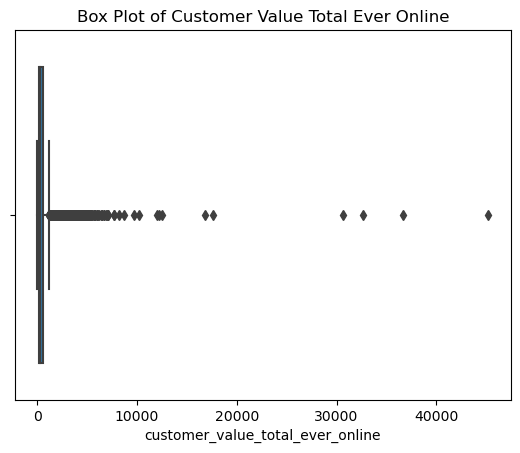

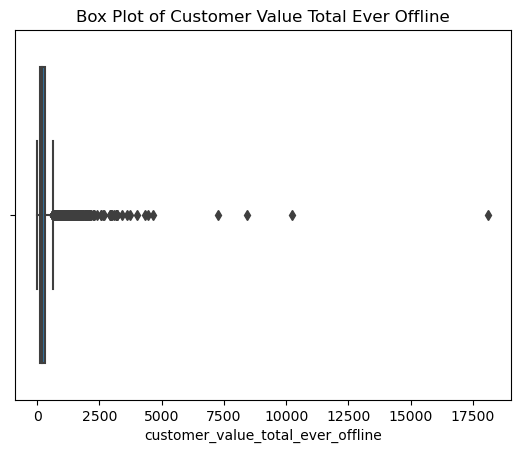

In [10]:
# Box plot for customer_value_total_ever_online
sns.boxplot(x=df['customer_value_total_ever_online'])
plt.title('Box Plot of Customer Value Total Ever Online')
plt.show()

# Box plot for customer_value_total_ever_offline
sns.boxplot(x=df['customer_value_total_ever_offline'])
plt.title('Box Plot of Customer Value Total Ever Offline')
plt.show()


In [11]:
# Calculate Q1 and Q3 for customer_value_total_ever_online
Q1_online = df['customer_value_total_ever_online'].quantile(0.25)
Q3_online = df['customer_value_total_ever_online'].quantile(0.75)
IQR_online = Q3_online - Q1_online

# Define bounds for outliers
lower_bound_online = Q1_online - 1.5 * IQR_online
upper_bound_online = Q3_online + 1.5 * IQR_online

# Identify and handle outliers
outliers_online_iqr = df[(df['customer_value_total_ever_online'] < lower_bound_online) | 
                         (df['customer_value_total_ever_online'] > upper_bound_online)]
print("Outliers based on IQR for Online Spending:")
print(outliers_online_iqr)

# Calculate Q1 and Q3 for customer_value_total_ever_offline
Q1_offline = df['customer_value_total_ever_offline'].quantile(0.25)
Q3_offline = df['customer_value_total_ever_offline'].quantile(0.75)
IQR_offline = Q3_offline - Q1_offline

# Define bounds for outliers
lower_bound_offline = Q1_offline - 1.5 * IQR_offline
upper_bound_offline = Q3_offline + 1.5 * IQR_offline

# Identify and handle outliers
outliers_offline_iqr = df[(df['customer_value_total_ever_offline'] < lower_bound_offline) | 
                          (df['customer_value_total_ever_offline'] > upper_bound_offline)]
print("Outliers based on IQR for Offline Spending:")
print(outliers_offline_iqr)

Outliers based on IQR for Online Spending:
                                  master_id order_channel last_order_channel  \
1      f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
11     c2e15af2-9eed-11e9-9897-000d3a38a36f   Android App        Android App   
14     241f0ad0-afb5-11e9-9757-000d3a38a36f       Ios App            Ios App   
41     6a46e618-16f8-11ea-b4ec-000d3a38a36f   Android App            Offline   
70     3af86bfe-5459-11ea-b1db-000d3a38a36f   Android App        Android App   
...                                     ...           ...                ...   
19875  21231ab8-b16f-11e9-89fa-000d3a38a36f   Android App        Android App   
19907  b5625f4e-a151-11eb-a568-000d3a38a36f   Android App            Offline   
19921  1b18778e-aa04-11e9-a2fc-000d3a38a36f        Mobile            Desktop   
19922  ba5cd8c2-b142-11e9-9757-000d3a38a36f       Ios App            Offline   
19936  1982ac0e-9f4c-11e9-9897-000d3a38a36f   Android App        Android App 

In [12]:
# Cap values for customer_value_total_ever_online
df['customer_value_total_ever_online'] = np.where(df['customer_value_total_ever_online'] > upper_bound_online, upper_bound_online, df['customer_value_total_ever_online'])
df['customer_value_total_ever_online'] = np.where(df['customer_value_total_ever_online'] < lower_bound_online, lower_bound_online, df['customer_value_total_ever_online'])

# Cap values for customer_value_total_ever_offline
df['customer_value_total_ever_offline'] = np.where(df['customer_value_total_ever_offline'] > upper_bound_offline, upper_bound_offline, df['customer_value_total_ever_offline'])
df['customer_value_total_ever_offline'] = np.where(df['customer_value_total_ever_offline'] < lower_bound_offline, lower_bound_offline, df['customer_value_total_ever_offline'])

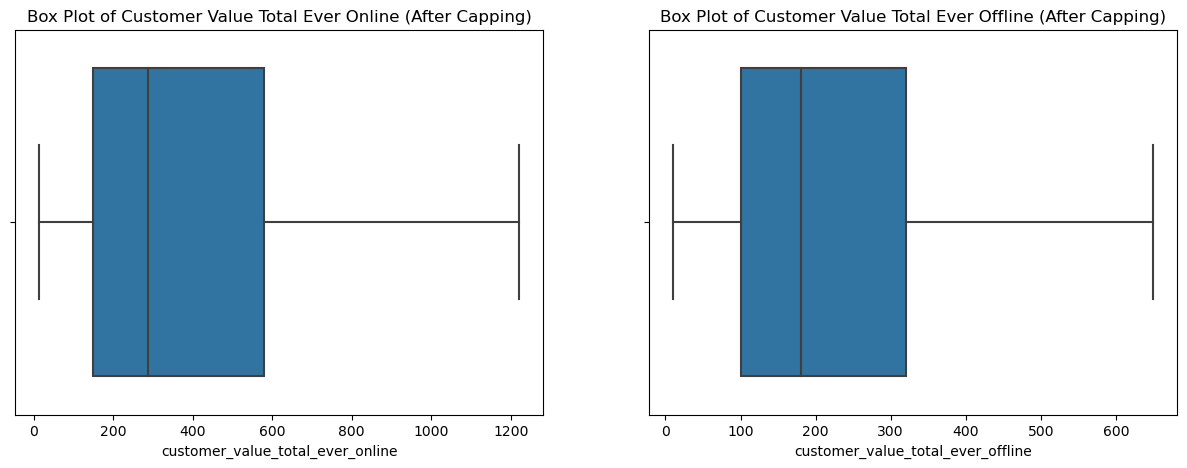

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['customer_value_total_ever_online'])
plt.title('Box Plot of Customer Value Total Ever Online (After Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['customer_value_total_ever_offline'])
plt.title('Box Plot of Customer Value Total Ever Offline (After Capping)')

plt.show()


In [14]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,232.448003,173.958850,10.00,99.99,179.98,319.97,649.94
customer_value_total_ever_online,19945.0,416.861882,352.914508,12.99,149.98,286.46,578.44,1221.13


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Consistency Checks:</font></h2>

In [15]:
# Example: Convert all values to lower case and strip any extra whitespace to handle inconsistencies
categorical_columns = ['order_channel', 'last_order_channel', 'interested_in_categories_12']
df['order_channel'] = df['order_channel'].str.lower().str.strip()
df['last_order_channel'] = df['last_order_channel'].str.lower().str.strip()
df['interested_in_categories_12'] = df['interested_in_categories_12'].str.lower().str.strip()

# Re-check unique values after normalization
for col in categorical_columns:
    print(f"Unique values in '{col}' after normalization:")
    print(df[col].unique())
    print("\n")


Unique values in 'order_channel' after normalization:
['android app' 'desktop' 'mobile' 'ios app']


Unique values in 'last_order_channel' after normalization:
['offline' 'mobile' 'android app' 'desktop' 'ios app']


Unique values in 'interested_in_categories_12' after normalization:
['[kadin]' '[erkek, cocuk, kadin, aktifspor]' '[erkek, kadin]'
 '[aktifcocuk, cocuk]' '[aktifspor]' '[cocuk]' '[erkek, cocuk, kadin]'
 '[kadin, aktifspor]' '[aktifcocuk, cocuk, kadin]'
 '[cocuk, kadin, aktifspor]' '[erkek, aktifspor]'
 '[aktifcocuk, cocuk, aktifspor]' '[erkek]' '[cocuk, kadin]'
 '[erkek, kadin, aktifspor]' '[aktifcocuk]' '[cocuk, aktifspor]'
 '[aktifcocuk, erkek, kadin, aktifspor]' '[erkek, cocuk]' '[]'
 '[aktifcocuk, cocuk, kadin, aktifspor]' '[aktifcocuk, erkek, cocuk]'
 '[aktifcocuk, erkek]' '[aktifcocuk, kadin]'
 '[aktifcocuk, erkek, cocuk, kadin, aktifspor]'
 '[aktifcocuk, erkek, cocuk, kadin]' '[aktifcocuk, aktifspor]'
 '[aktifcocuk, erkek, cocuk, aktifspor]' '[aktifcocuk, kadin, akt

In [16]:
# List of date columns
date_columns = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']

# Check for invalid dates (NaT means Not a Time, which indicates invalid date entries)
for col in date_columns:
    invalid_dates = df[df[col].isna()]
    print(f"Invalid dates in '{col}': {len(invalid_dates)}")
    if len(invalid_dates) > 0:
        print(invalid_dates[[col]])
    print("\n")

Invalid dates in 'first_order_date': 0


Invalid dates in 'last_order_date': 0


Invalid dates in 'last_order_date_online': 0


Invalid dates in 'last_order_date_offline': 0




<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Data Exploration and Visualization:</font></h2>

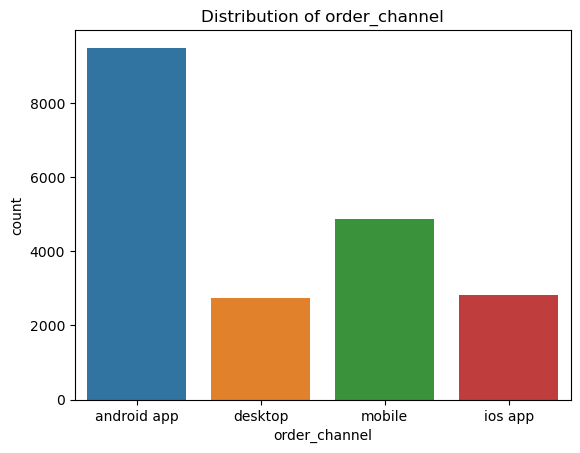

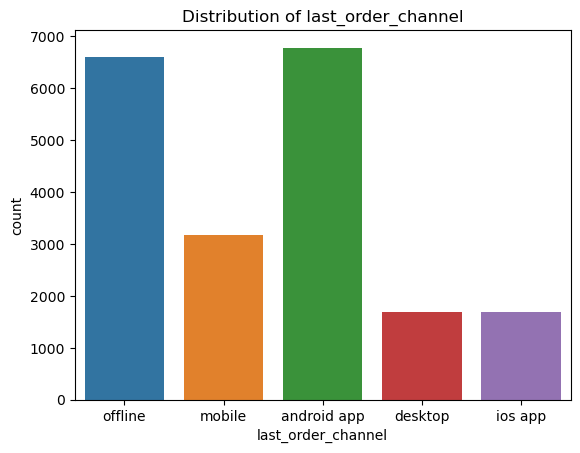

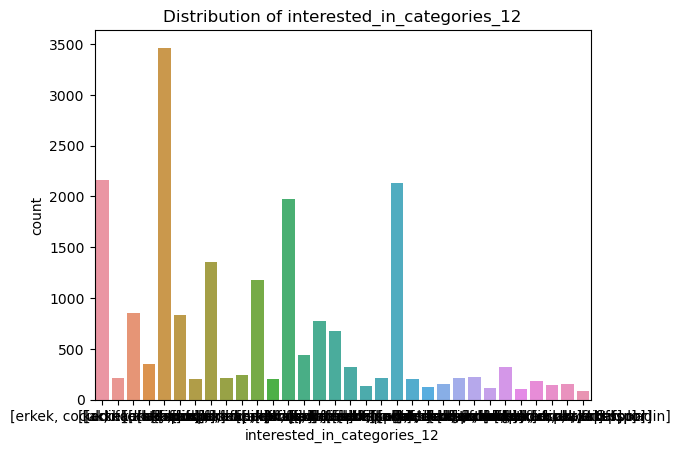

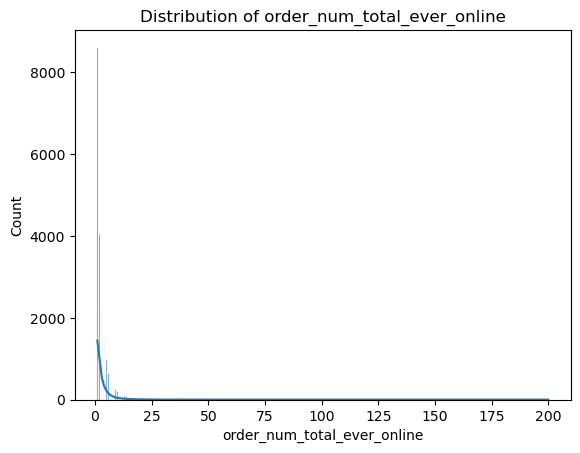

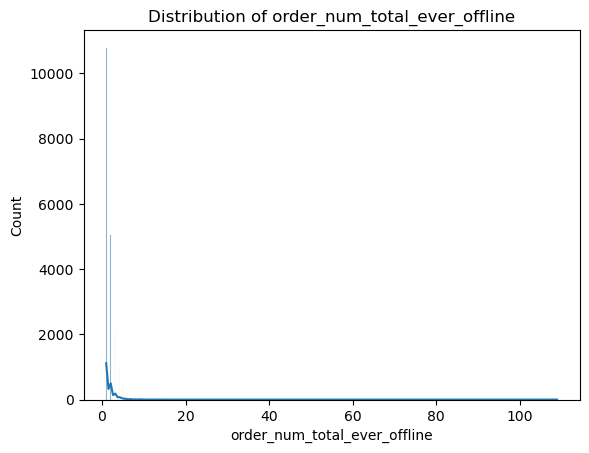

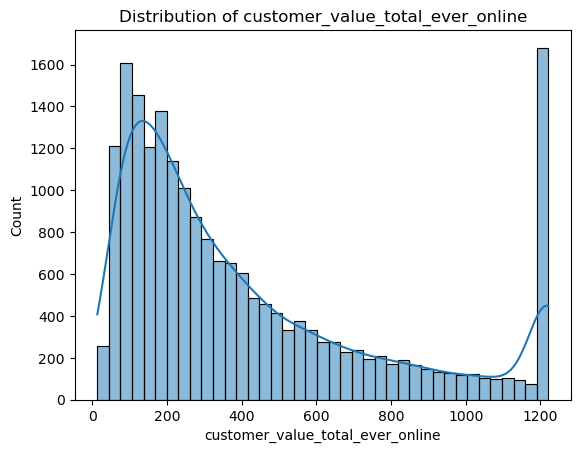

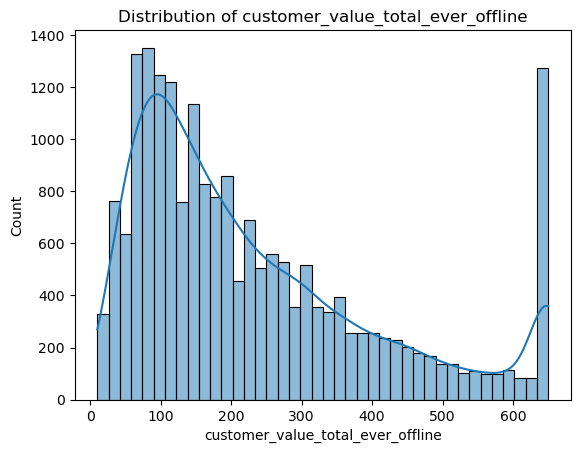

In [17]:
# Categorical Variables Distribution
for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

# Numerical Variables Distribution
num_columns = ['order_num_total_ever_online', 'order_num_total_ever_offline', 
               'customer_value_total_ever_online', 'customer_value_total_ever_offline']
for col in num_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


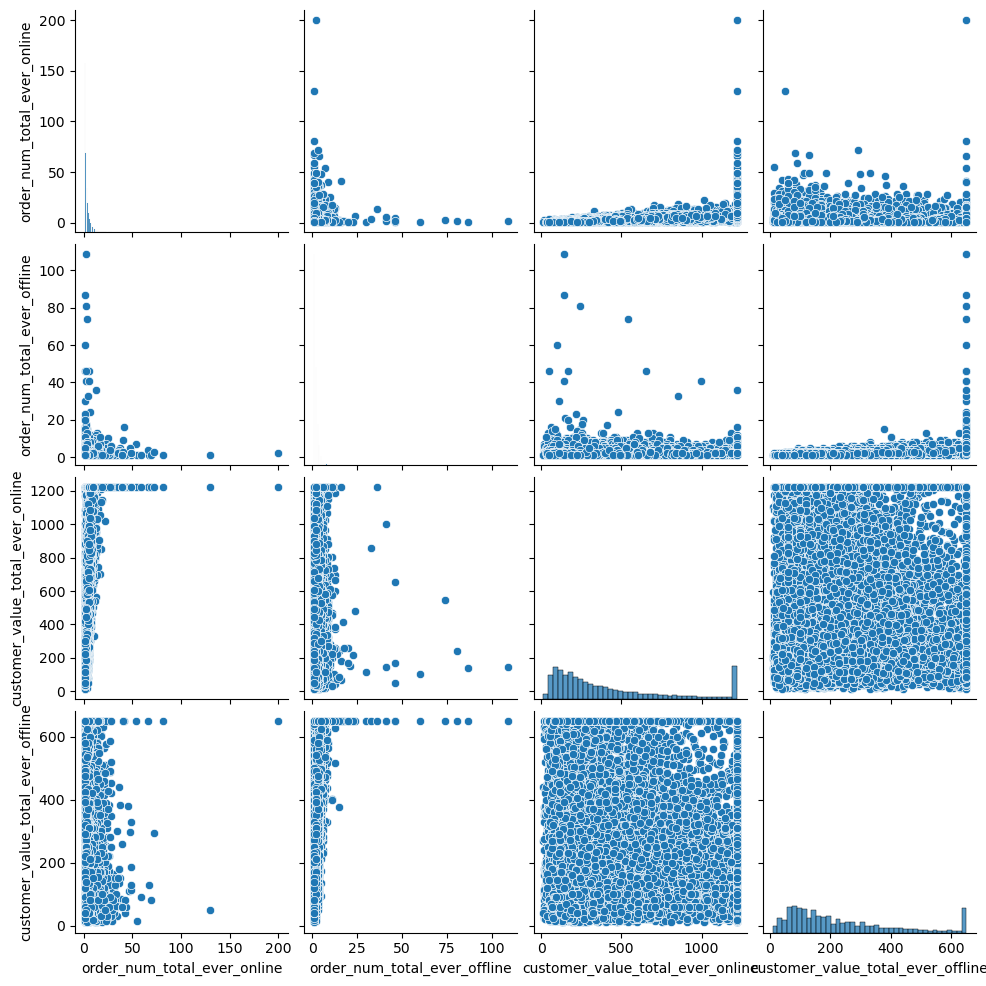

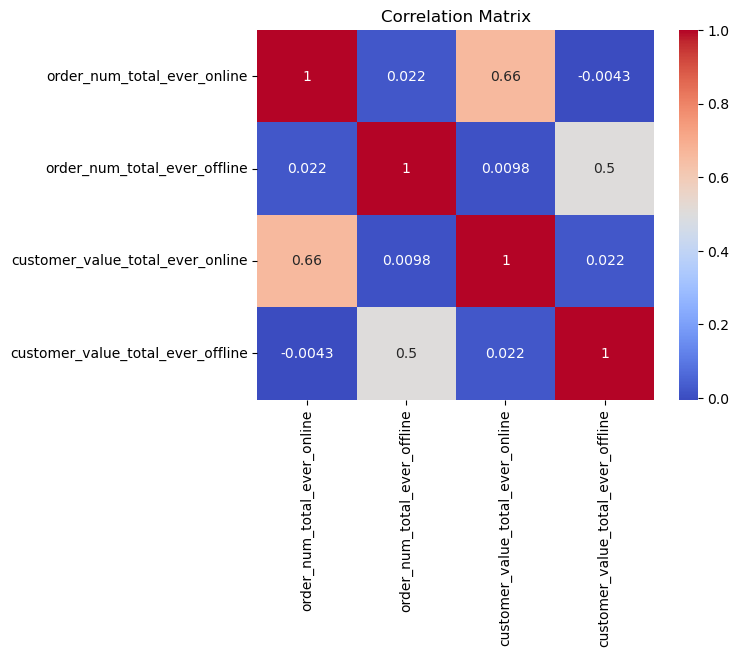

In [18]:
# Scatter plot for numerical features
sns.pairplot(df[num_columns])
plt.show()

# Correlation Heatmap
corr = df[num_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>RFM Analysis:</font></h2>

In [19]:
# Assuming the 'last_order_date' column is in datetime format, if not, convert it
# df['last_order_date'] = pd.to_datetime(df['last_order_date'])

# Set a reference date for calculating recency (e.g., the most recent date in your dataset)
reference_date = df['last_order_date'].max()

# Recency: Days since last purchase
df['Recency'] = (reference_date - df['last_order_date']).dt.days

# Frequency: Total number of purchases (online + offline)
df['Frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

# Monetary: Total amount spent (online + offline)
df['Monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

# Select the RFM columns for clustering
rfm_df = df[['Recency', 'Frequency', 'Monetary']]

# Display the first few rows
rfm_df.head()

,Recency,Frequency,Monetary
0,93,5.0,939.37
1,103,21.0,1381.10
2,184,5.0,585.32
3,133,2.0,121.97
4,84,2.0,209.98


In [20]:
# Score each metric (1-5 scale)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine RFM score into a single RFM_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the first few rows
rfm_df.head()


C:\Users\91932\AppData\Local\Temp\ipykernel_23036\786895798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
C:\Users\91932\AppData\Local\Temp\ipykernel_23036\786895798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
C:\Users\91932\AppData\Local\Temp\ipykernel_23036\786895798.py:4: SettingWithCopyWarning: 
A value is trying to be se

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,93,5.0,939.37,3,4,4,344
1,103,21.0,1381.10,3,5,5,355
2,184,5.0,585.32,2,4,3,243
3,133,2.0,121.97,3,1,1,311
4,84,2.0,209.98,3,1,1,311


In [21]:
# Define RFM Segments
rfm_df['Segment'] = rfm_df['RFM_Score'].apply(lambda x: 'Best Customers' if x in ['555', '554', '545'] else
                                                         'Loyal Customers' if x in ['455', '454', '445'] else
                                                         'Big Spenders' if x in ['355', '354', '345'] else
                                                         'New Customers' if x in ['255', '254', '245'] else
                                                         'At Risk' if x in ['155', '154', '145'] else 'Other')

# Display the segment counts
segment_counts = rfm_df['Segment'].value_counts()
print(segment_counts)


Segment
Other              15346
Best Customers      1240
Loyal Customers     1113
Big Spenders         859
New Customers        752
At Risk              635
Name: count, dtype: int64


C:\Users\91932\AppData\Local\Temp\ipykernel_23036\3886173692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Segment'] = rfm_df['RFM_Score'].apply(lambda x: 'Best Customers' if x in ['555', '554', '545'] else


In [22]:
# Calculate average Recency, Frequency, and Monetary for each segment
segment_analysis = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(segment_analysis)


           Segment     Recency  Frequency     Monetary
0          At Risk  292.296063   9.825197  1151.868551
1   Best Customers   14.883871  10.857258  1259.643613
2     Big Spenders  109.894063  10.497090  1200.252852
3  Loyal Customers   54.677448  10.378257  1224.706613
4    New Customers  183.663564   9.936170  1195.341636
5            Other  139.739867   3.419588   479.869573


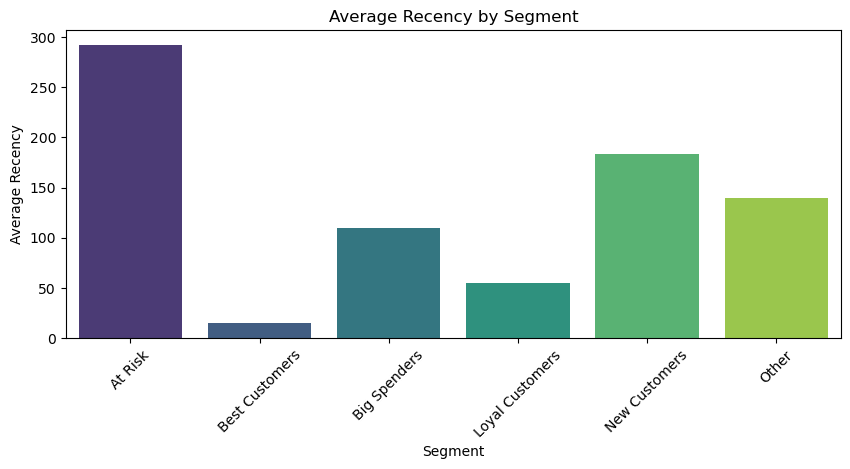

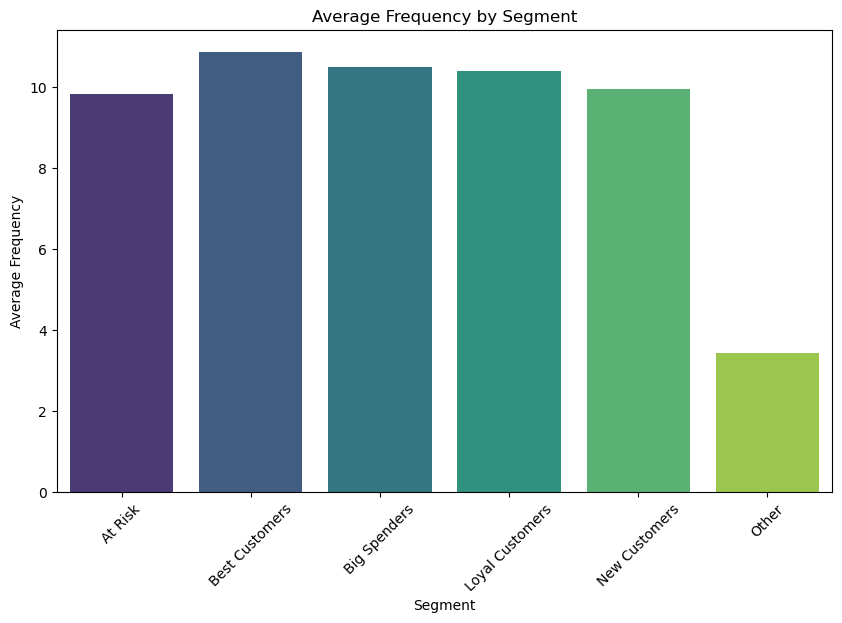

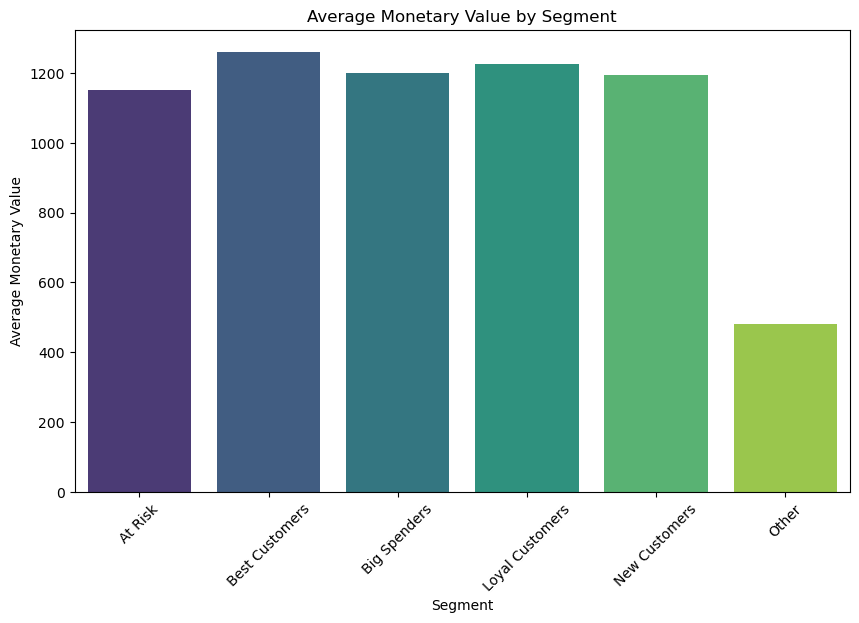

In [23]:
# Plot the distribution of customer segments
plt.figure(figsize=(10, 4))
sns.barplot(x=segment_analysis['Segment'], y=segment_analysis['Recency'], palette='viridis')
plt.title('Average Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Recency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis['Segment'], y=segment_analysis['Frequency'], palette='viridis')
plt.title('Average Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis['Segment'], y=segment_analysis['Monetary'], palette='viridis')
plt.title('Average Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Monetary Value')
plt.xticks(rotation=45)
plt.show()


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>CLV Calculations:</font></h2>

In [29]:
# Assuming rfm_df contains the RFM calculations and Segment column
df = df.merge(rfm_df[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']], left_index=True, right_index=True, how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [30]:
# Calculate Average Order Value (AOV)
df['Total_Revenue'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']
df['Total_Orders'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['AOV'] = df['Total_Revenue'] / df['Total_Orders']

# Calculate Purchase Frequency (for each customer)
df['PF'] = df['Total_Orders'] / df.shape[0]

# Calculate Customer Value
df['Customer_Value'] = df['AOV'] * df['PF']

# Calculate Average Customer Lifetime
df['Customer_Lifespan'] = (df['last_order_date'] - df['first_order_date']).dt.days
avg_customer_lifespan = df['Customer_Lifespan'].mean()

# Calculate CLV
df['CLV'] = df['Customer_Value'] * avg_customer_lifespan


In [31]:
df['CLV_Segment'] = pd.qcut(df['CLV'], 3, labels=['Low', 'Medium', 'High'])


Segment      At Risk  Best Customers  Big Spenders  Loyal Customers  \
CLV_Segment                                                           
Low                0               0             0                0   
Medium            42              29            44               45   
High             593            1211           815             1068   

Segment      New Customers  Other  
CLV_Segment                        
Low                      0   6649  
Medium                  36   6452  
High                   716   2245  


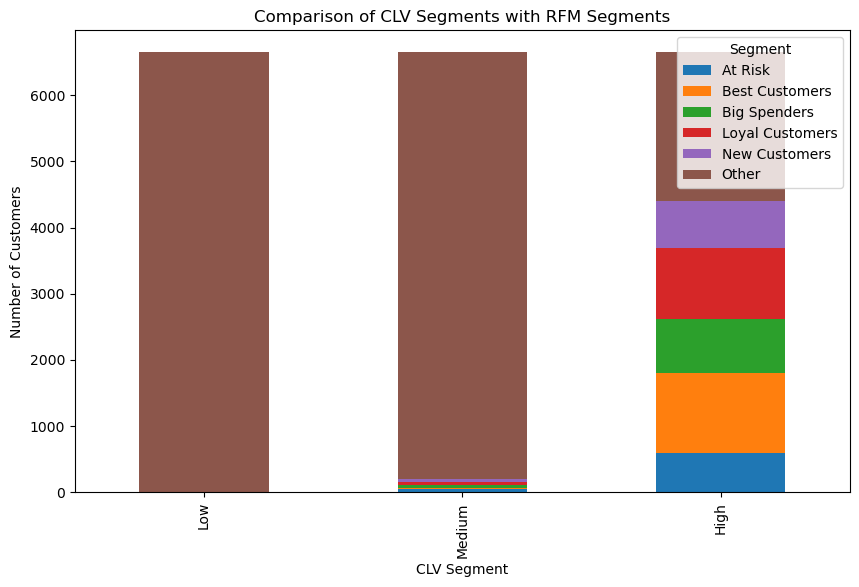

In [32]:
clv_rfm_comparison = df.groupby(['CLV_Segment', 'Segment']).size().unstack().fillna(0)
print(clv_rfm_comparison)

# Optional: Visualize the comparison
clv_rfm_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comparison of CLV Segments with RFM Segments')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Deep Dive into the High CLV Segment:</font></h2>

In [35]:
# Drop duplicate columns
df = df.drop(columns=['Recency_y', 'Frequency_y', 'Monetary_y'])

# Rename the remaining columns for clarity
df.rename(columns={
    'Recency_x': 'Recency',
    'Frequency_x': 'Frequency',
    'Monetary_x': 'Monetary'
}, inplace=True)

# Check the DataFrame info to confirm changes
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

           Segment     Recency         Frequency       
                          mean median       mean median
0          At Risk  291.903879  294.0   9.880270    8.0
1   Best Customers   14.900083   14.0  10.913295    9.0
2     Big Spenders  109.855215  108.0  10.625767    9.0
3  Loyal Customers   54.749064   54.0  10.479401    9.0
4    New Customers  183.710894  184.0  10.027933    8.0
5            Other  121.605791  102.0   4.365702    4.0


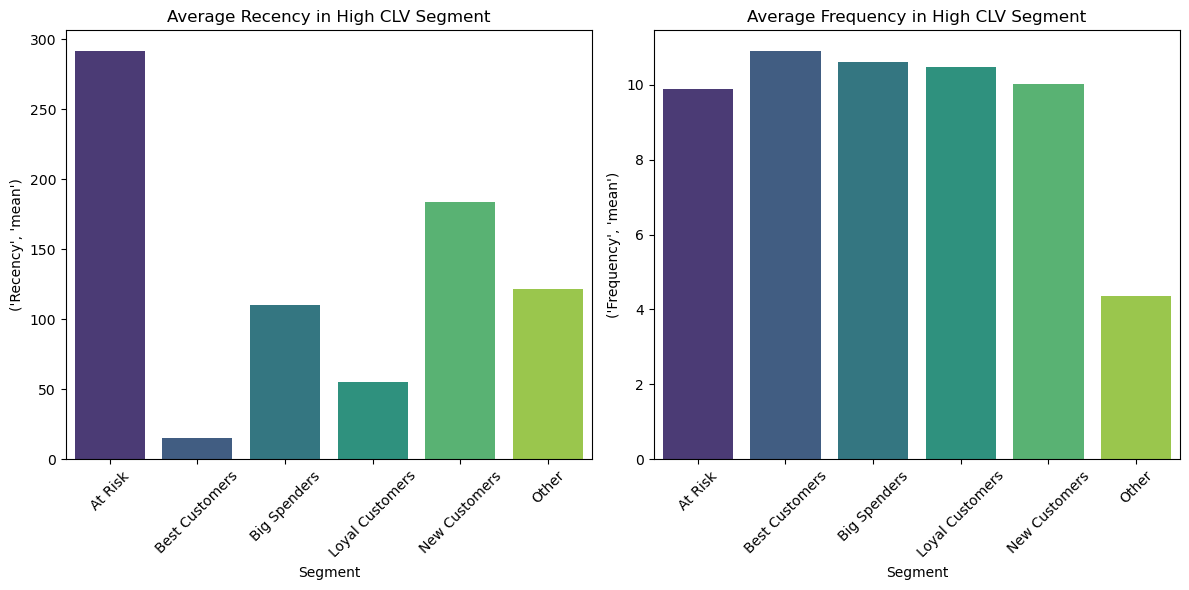

In [36]:
# Filter data for High CLV segment
high_clv_df = df[df['CLV_Segment'] == 'High']

# Compare Recency and Frequency within High CLV segment and Best Customers/Loyal Customers RFM segments
high_clv_rfm_comparison = high_clv_df.groupby('Segment').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median']
}).reset_index()

print(high_clv_rfm_comparison)

# Visualize the Recency and Frequency comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y=('Recency', 'mean'), data=high_clv_rfm_comparison, palette='viridis')
plt.title('Average Recency in High CLV Segment')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Segment', y=('Frequency', 'mean'), data=high_clv_rfm_comparison, palette='viridis')
plt.title('Average Frequency in High CLV Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Analyze Category Preferences::</font></h2>

In [37]:
# Count the frequency of categories in each segment
category_preferences = df.groupby(['CLV_Segment', 'Segment'])['interested_in_categories_12'].apply(lambda x: x.str.get_dummies(sep=',').sum()).reset_index()

# Focus on High CLV Segment and Best/Loyal Customers RFM Segments
high_clv_categories = category_preferences[(category_preferences['CLV_Segment'] == 'High') & (category_preferences['Segment'].isin(['Best Customers', 'Loyal Customers']))]

# Display the category preferences
print(high_clv_categories)


    CLV_Segment          Segment       level_2  interested_in_categories_12
127        High   Best Customers    aktifspor]                          664
128        High   Best Customers         cocuk                          279
129        High   Best Customers        cocuk]                           42
130        High   Best Customers         erkek                          172
131        High   Best Customers        erkek]                           11
132        High   Best Customers         kadin                          338
133        High   Best Customers        kadin]                          148
134        High   Best Customers            []                           87
135        High   Best Customers   [aktifcocuk                          363
136        High   Best Customers  [aktifcocuk]                           26
137        High   Best Customers   [aktifspor]                          100
138        High   Best Customers        [cocuk                           95
139        H

In [43]:
# Convert categories to strings and clean the data
df['cleaned_categories'] = df['interested_in_categories_12'].astype(str).str.replace(r'[\[\]]', '', regex=True).str.strip()

# Split multiple categories into separate rows
df['cleaned_categories'] = df['cleaned_categories'].str.split(',')

# Explode the categories into separate rows
exploded_df = df.explode('cleaned_categories')

# Remove leading/trailing spaces from categories
exploded_df['cleaned_categories'] = exploded_df['cleaned_categories'].str.strip()


In [46]:
# Filter data for High CLV Segment and Best/Loyal Customers RFM Segments
high_clv_data = exploded_df[(exploded_df['CLV_Segment'] == 'High') & (exploded_df['Segment'].isin(['Best Customers', 'Loyal Customers']))]
high_clv_data

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,Segment,Total_Revenue,Total_Orders,AOV,PF,Customer_Value,Customer_Lifespan,CLV,CLV_Segment,cleaned_categories
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,android app,android app,2015-07-05,2021-05-19,2021-05-19,2020-07-10,19.0,1.0,90.49,...,Best Customers,1311.62,20.0,65.581000,0.001003,0.065762,2145,43.852923,High,cocuk
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,android app,android app,2015-07-05,2021-05-19,2021-05-19,2020-07-10,19.0,1.0,90.49,...,Best Customers,1311.62,20.0,65.581000,0.001003,0.065762,2145,43.852923,High,kadin
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,android app,android app,2015-07-05,2021-05-19,2021-05-19,2020-07-10,19.0,1.0,90.49,...,Best Customers,1311.62,20.0,65.581000,0.001003,0.065762,2145,43.852923,High,aktifspor
14,241f0ad0-afb5-11e9-9757-000d3a38a36f,ios app,ios app,2018-12-28,2021-05-30,2021-05-30,2019-10-20,23.0,1.0,139.00,...,Best Customers,1360.13,24.0,56.672083,0.001203,0.068194,884,45.474814,High,erkek
14,241f0ad0-afb5-11e9-9757-000d3a38a36f,ios app,ios app,2018-12-28,2021-05-30,2021-05-30,2019-10-20,23.0,1.0,139.00,...,Best Customers,1360.13,24.0,56.672083,0.001203,0.068194,884,45.474814,High,aktifspor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19922,ba5cd8c2-b142-11e9-9757-000d3a38a36f,ios app,offline,2018-10-13,2021-03-13,2020-05-12,2021-03-13,10.0,1.0,17.99,...,Loyal Customers,1239.12,11.0,112.647273,0.000552,0.062127,882,41.428946,High,erkek
19926,7e1c15be-6298-11ea-9861-000d3a38a36f,android app,android app,2019-02-16,2021-05-22,2021-05-22,2020-03-06,6.0,2.0,310.70,...,Best Customers,1373.09,8.0,171.636250,0.000401,0.068844,826,45.908121,High,kadin
19926,7e1c15be-6298-11ea-9861-000d3a38a36f,android app,android app,2019-02-16,2021-05-22,2021-05-22,2020-03-06,6.0,2.0,310.70,...,Best Customers,1373.09,8.0,171.636250,0.000401,0.068844,826,45.908121,High,aktifspor
19931,c81bac06-b1f4-11e9-89fa-000d3a38a36f,android app,android app,2019-07-23,2021-04-07,2021-04-07,2020-02-12,7.0,2.0,99.98,...,Loyal Customers,1181.72,9.0,131.302222,0.000451,0.059249,624,39.509825,High,cocuk


In [47]:
# Count the occurrences of each category
category_counts = high_clv_data['cleaned_categories'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Sort the results by total counts
category_counts_sorted = category_counts.sort_values(by='Count', ascending=False)

# Display the aggregated category preferences
print(category_counts_sorted)



     Category  Count
0   aktifspor   1448
1       kadin   1178
2       erkek   1053
3       cocuk    766
4  aktifcocuk    705
5                153


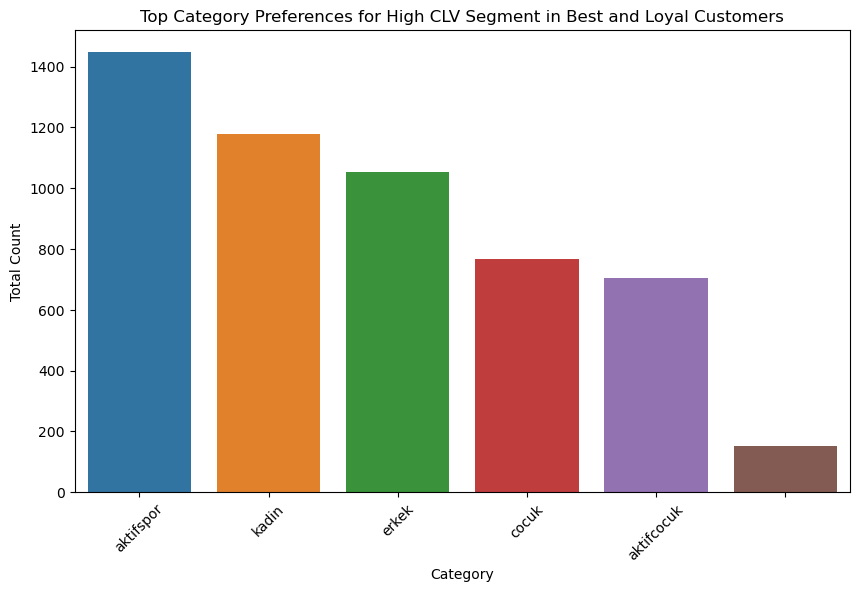

In [48]:


# Plot the top categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts_sorted, x='Category', y='Count')
plt.xticks(rotation=45)
plt.title('Top Category Preferences for High CLV Segment in Best and Loyal Customers')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.show()


In [49]:
# Analyze channel preferences within the High CLV segment
channel_prefs = high_clv_data.groupby(['cleaned_categories', 'order_channel']).size().reset_index(name='Counts')

# Pivot the data to get a better view
channel_pivot = channel_prefs.pivot(index='cleaned_categories', columns='order_channel', values='Counts').fillna(0)

# Display the pivot table
print(channel_pivot)


order_channel       android app  desktop  ios app  mobile
cleaned_categories                                       
                             72       15       23      43
aktifcocuk                  460       35      108     102
aktifspor                   917       84      246     201
cocuk                       493       41      125     107
erkek                       695       56      180     122
kadin                       744       74      178     182


In [50]:
# Cross-tabulate category and channel preferences
cross_tab = pd.crosstab(high_clv_data['cleaned_categories'], high_clv_data['order_channel'])

# Normalize by rows to get proportions
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Display the cross-tabulation
print(cross_tab_normalized)


order_channel       android app   desktop   ios app    mobile
cleaned_categories                                           
                       0.470588  0.098039  0.150327  0.281046
aktifcocuk             0.652482  0.049645  0.153191  0.144681
aktifspor              0.633287  0.058011  0.169890  0.138812
cocuk                  0.643603  0.053525  0.163185  0.139687
erkek                  0.660019  0.053181  0.170940  0.115859
kadin                  0.631579  0.062818  0.151104  0.154499


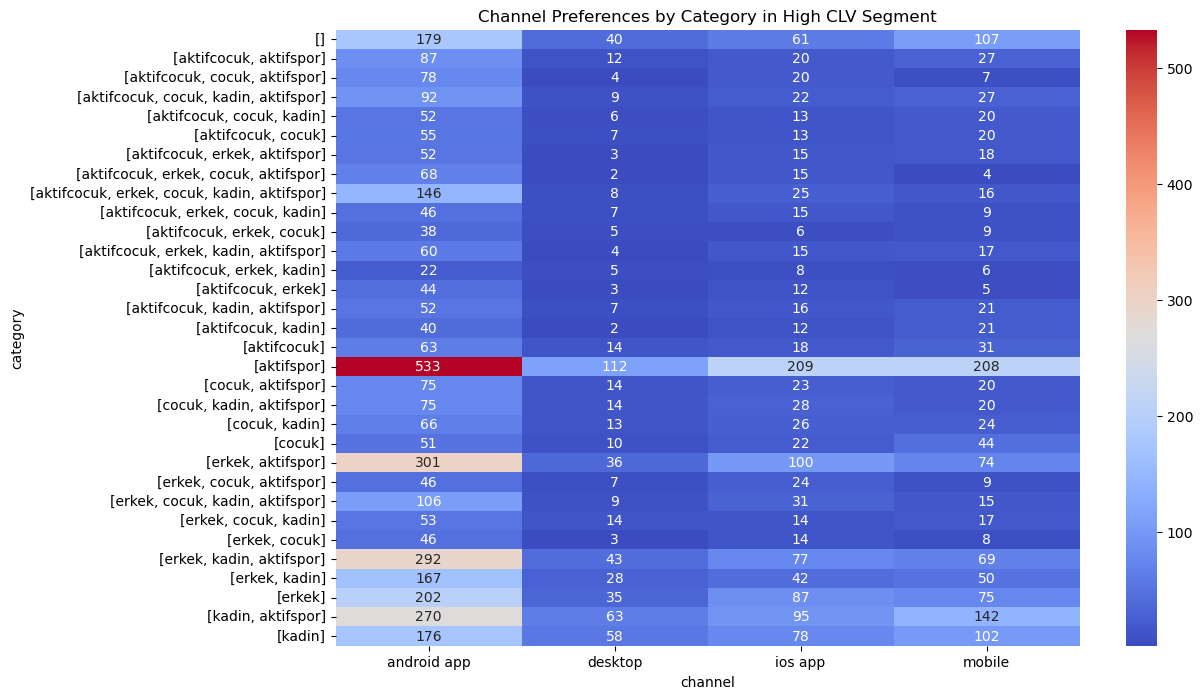

In [53]:
# Pivot the data to aggregate channel preferences by category
channel_preferences_pivot = channel_preferences_melted.pivot_table(
    index='category', 
    columns='channel', 
    values='count', 
    fill_value=0
)

# Plot heatmap of channel preferences by category
plt.figure(figsize=(12, 8))
sns.heatmap(channel_preferences_pivot, annot=True, cmap='coolwarm', fmt='g')
plt.title('Channel Preferences by Category in High CLV Segment')
plt.show()



In [54]:
# Profile for Best Customers
best_customers_profile = high_clv_data[high_clv_data['Segment'] == 'Best Customers']
best_customers_profile_summary = best_customers_profile[['interested_in_categories_12', 'order_channel']].describe(include='object')

# Profile for Loyal Customers
loyal_customers_profile = high_clv_data[high_clv_data['Segment'] == 'Loyal Customers']
loyal_customers_profile_summary = loyal_customers_profile[['interested_in_categories_12', 'order_channel']].describe(include='object')

print("Best Customers Profile:")
print(best_customers_profile_summary)

print("\nLoyal Customers Profile:")
print(loyal_customers_profile_summary)


Best Customers Profile:
       interested_in_categories_12 order_channel
count                         1211          1211
unique                          32             4
top      [erkek, kadin, aktifspor]   android app
freq                           101           763

Loyal Customers Profile:
       interested_in_categories_12 order_channel
count                         1068          1068
unique                          32             4
top                    [aktifspor]   android app
freq                           117           631


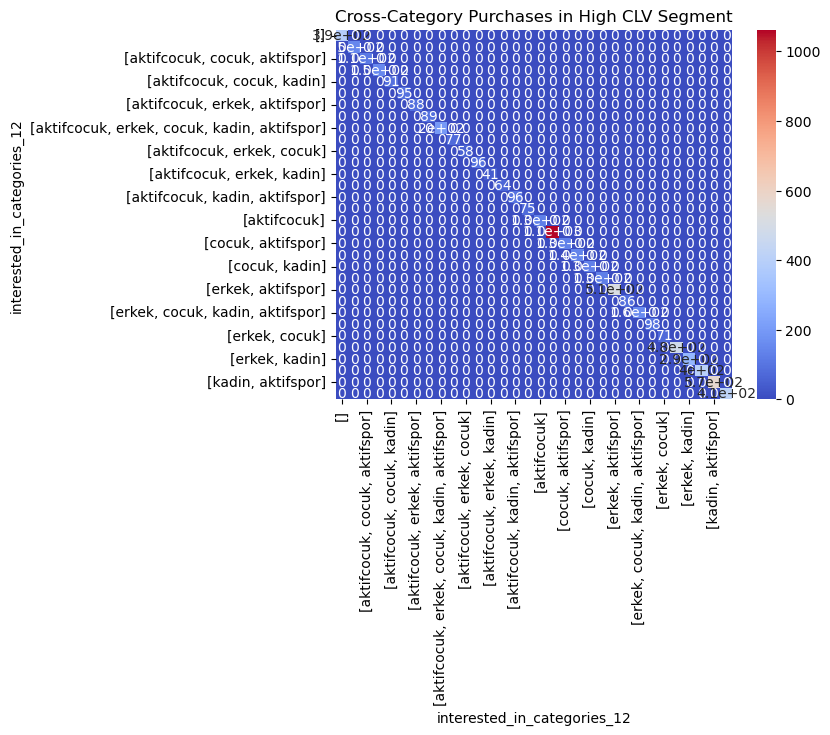

In [55]:
# Create a cross-tabulation of category preferences
cross_category_matrix = pd.crosstab(high_clv_data['interested_in_categories_12'], high_clv_data['interested_in_categories_12'])
sns.heatmap(cross_category_matrix, annot=True, cmap='coolwarm')
plt.title('Cross-Category Purchases in High CLV Segment')
plt.show()
